In [1]:
import pandas as pd

In [2]:
!pip install pandas

In [3]:
# Load the dataset from the CSV file
df = pd.read_csv(r"D:\UoS Applied Data Science\PROM02\Dataset\new\electric1.csv")

# Display the first and last five rows of the dataset to verify the data and the columns
df

,Gender,Age_Range,Education_Level,Location,Country,Heard_of_EC,Someone_Owns,Self_Own_EC,Satisfied_Experience,Displace_Normal_Cars,...,Consider_Government_Incentives,Consider_Model,Consider_Charging_Time,Reduction_Greenhouse_Positive,Reduction_Fossil_Positive,Lower_Cost_Positive,Range_Charging_Barrier,Upfront_Cost_Barrier,Gov_Offer_Incentives,Gov_Set_Emissions
0,Male,51-61,Master's Degree or Higher,Shanghai,China,Yes,Yes,Yes,Very Satisfied,Agree,...,Somewhat Agree,Neither Agree nor Disagree,Strongly Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Disagree
1,Male,29-39,Bachelor's Degree,"Guangzhou, china",China,Yes,Yes,No,Not Applicable,Strongly Agree,...,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Disagree
2,Male,29-39,Bachelor's Degree,China,China,Yes,Yes,No,Not Applicable,Somewhat Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Agree
3,Male,29-39,Master's Degree or Higher,Shanghai,China,Yes,Yes,No,Not Applicable,Neither Agree nor Disagree,...,Agree,Strongly Agree,Somewhat Agree,Neither Agree nor Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neither Agree nor Disagree,Strongly Agree,Neither Agree nor Disagree
4,Female,29-39,Bachelor's Degree,chIna,China,Yes,Yes,Yes,Satisfied,Strongly Agree,...,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Male,18-28,Secondary School,Accra,Ghana,Yes,No,No,Not Applicable,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Somewhat Agree
226,Female,18-28,Secondary School,Kumasi,Ghana,Yes,No,No,Not Applicable,Somewhat Agree,...,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Disagree,Strongly Agree,Strongly Agree,Agree,Agree
227,Male,29-39,College or Vocational Training,Accra,Ghana,Yes,No,No,Not Applicable,Strongly Agree,...,Neither Agree nor Disagree,Somewhat Disagree,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Agree,Strongly Agree,Strongly Agree
228,Female,18-28,Secondary School,Accra,Ghana,Yes,No,No,Not Applicable,Somewhat Agree,...,Agree,Somewhat Agree,Strongly Agree,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Agree,Agree


In [4]:
print(df.columns)

Index(['Gender', 'Age_Range', 'Education_Level', 'Location', 'Country',
       'Heard_of_EC', 'Someone_Owns', 'Self_Own_EC', 'Satisfied_Experience',
       'Displace_Normal_Cars', 'Recommend_EC', 'Consider_Environment',
       'Consider_Cost', 'Consider_Range', 'Consider_Charging Infrastructure',
       'Consider_Government_Incentives', 'Consider_Model',
       'Consider_Charging_Time', 'Reduction_Greenhouse_Positive',
       'Reduction_Fossil_Positive', 'Lower_Cost_Positive',
       'Range_Charging_Barrier', 'Upfront_Cost_Barrier',
       'Gov_Offer_Incentives', 'Gov_Set_Emissions'],
      dtype='object')


In [5]:
df["Consider_Environment"]

0                  Agree
1         Strongly Agree
2         Somewhat Agree
3         Strongly Agree
4                  Agree
             ...        
225    Somewhat Disagree
226             Disagree
227    Somewhat Disagree
228             Disagree
229    Somewhat Disagree
Name: Consider_Environment, Length: 230, dtype: object

In [6]:
# Encoding scheme for "Consider" variables
consider_encoding_map = {
    "Strongly Agree": 6,
    "Agree": 5,
    "Somewhat Agree": 4,
    "Neither Agree nor Disagree": 3,  
    "Disagree": 2,
    "Somewhat Disagree": 1,
    "Strongly Disagree": 0
}


# Encode the "Consider" variables with the scheme
df["Consider_Environment_Encoded"] = df["Consider_Environment"].map(consider_encoding_map)
df["Consider_Range_Encoded"] = df["Consider_Range"].map(consider_encoding_map)
df["Consider_Charging_Infrastructure_Encoded"] = df["Consider_Charging Infrastructure"].map(consider_encoding_map)



In [7]:
df["Consider_Environment_Encoded"]

0      5
1      6
2      4
3      6
4      5
      ..
225    1
226    2
227    1
228    2
229    1
Name: Consider_Environment_Encoded, Length: 230, dtype: int64

In [8]:
# Inspect unique values of "Recommend_EC" before encoding
df["Recommend_EC"].unique()

array(['Likely', 'Somewhat Likely', 'Somewhat Unlikely',
       'Neither Likely nor Unlikely', 'Very Likely', 'Unlikely',
       'Very Unlikely'], dtype=object)

In [9]:
# Encoding "Recommend_EC" with a binary scheme
recommend_ec_encoding_map = {
    "Very Likely": 1,
    "Likely": 1,
    "Somewhat Likely": 1,
    "Neither Likely nor Unlikely": 0,
    "Somewhat Unlikely": 0,
    "Unlikely": 0,
    "Very Unlikely": 0
}

df["Recommend_EC_Encoded"] = df["Recommend_EC"].map(recommend_ec_encoding_map)



In [10]:
df["Recommend_EC_Encoded"]

0      1
1      1
2      1
3      1
4      1
      ..
225    0
226    0
227    0
228    0
229    0
Name: Recommend_EC_Encoded, Length: 230, dtype: int64

In [11]:
# Prepare the feature [independent] variables (X) and the target [dependent] variable (y) for the model
X = df[["Consider_Environment_Encoded", "Consider_Range_Encoded", "Consider_Charging_Infrastructure_Encoded"]]
y = df["Recommend_EC_Encoded"]

In [12]:
# Display the encoded variables to verify the encoding process
X.head(), y.head()

(   Consider_Environment_Encoded  Consider_Range_Encoded  \
 0                             5                       5   
 1                             6                       6   
 2                             4                       1   
 3                             6                       6   
 4                             5                       5   
 
    Consider_Charging_Infrastructure_Encoded  
 0                                         1  
 1                                         5  
 2                                         5  
 3                                         6  
 4                                         5  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: Recommend_EC_Encoded, dtype: int64)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Creating the logistic regression model
logistic_model = LogisticRegression()

In [16]:
# Training the model
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Making predictions on the test set
y_pred = logistic_model.predict(X_test)

In [18]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report

(0.782608695652174,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.33      0.50        15\n           1       0.76      1.00      0.86        31\n\n    accuracy                           0.78        46\n   macro avg       0.88      0.67      0.68        46\nweighted avg       0.84      0.78      0.74        46\n')

In [19]:
# Printing the coefficients of the model
print('Intercept:', logistic_model.intercept_)
print('Coefficients:', logistic_model.coef_)

Intercept: [-5.45284207]
Coefficients: [[ 1.37402748 -0.11189086  0.35264741]]


In [26]:
# Data Visualiztion of the predictor variables in the model

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# The coefficients of predictor variables
coefficients = np.array([1.37402748, -0.11189086, 0.35264741])
variables = ['Consider_Environment', 'Consider_Range', 'Consider_Charging_Infrastructure']

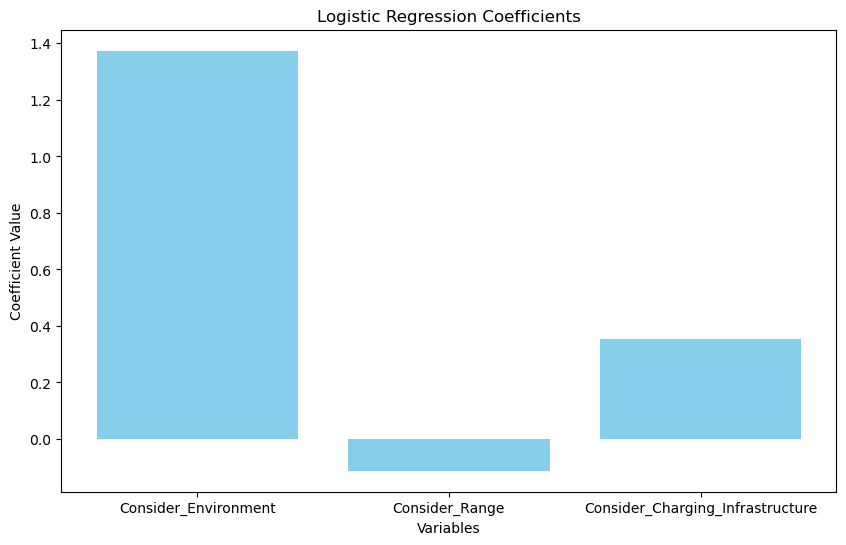

In [27]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(variables, coefficients, color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')

# Show the plot
plt.show()

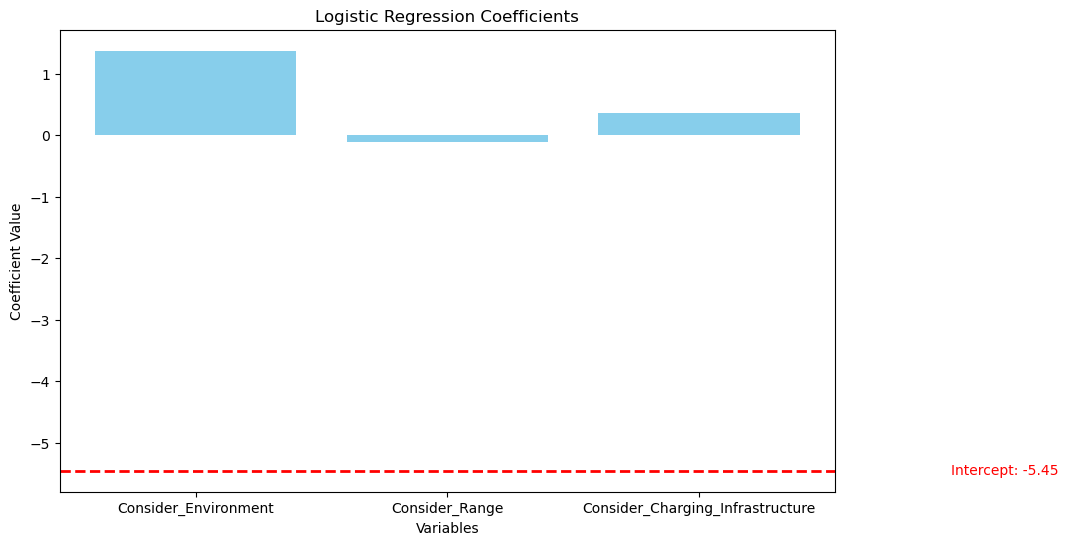

In [29]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(variables, coefficients, color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')


# Adding the intercept to the plot
plt.axhline(intercept, color='red', linewidth=2, linestyle='--')
plt.text(len(coefficients), intercept, f'Intercept: {intercept:.2f}', color='red', va='center')

# Show the plot
plt.show()